# Statistics

## Data Loading

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('/Users/leonardvincentramil/Desktop/Semester Project/ITKTubeTK/results_ITKTubeTK/TotalDatasetVessel.xlsx')

# Inspect initial data
print(df.info())

# Identify and drop constant columns (columns with 0 variance)
constant_columns = [col for col in df.columns if df[col].nunique() <= 1]
df_cleaned = df.drop(columns=constant_columns)

print(f"Dropped constant columns: {constant_columns}")
print(f"New data shape: {df_cleaned.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   file_sorgente                                    436 non-null    object 
 1   total_length                                     436 non-null    float64
 2   num_bifurcations                                 436 non-null    int64  
 3   volume                                           436 non-null    float64
 4   num_loops                                        436 non-null    int64  
 5   num_abnormal_degree_nodes                        436 non-null    int64  
 6   Largest_endpoint_root_mean_curvature             436 non-null    float64
 7   Largest_endpoint_root_mean_square_curvature      436 non-null    int64  
 8   2nd_Largest_endpoint_root_mean_curvature         436 non-null    float64
 9   2nd_Largest_endpoint_root_mean_s

## Correlation & Boxplots

### Correlation

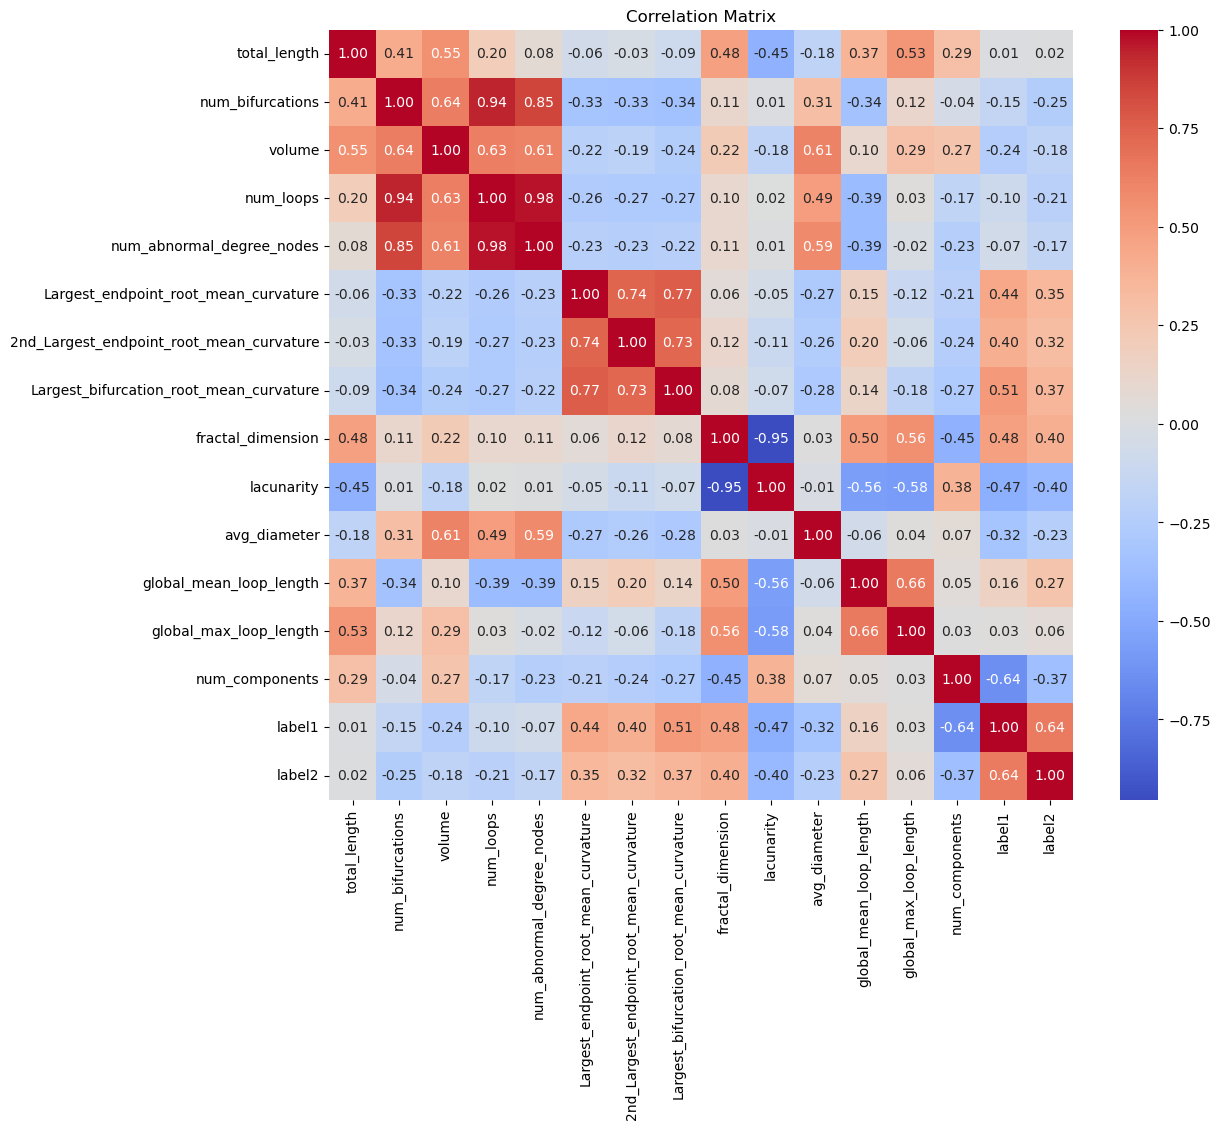

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_cleaned.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### BoxPlots

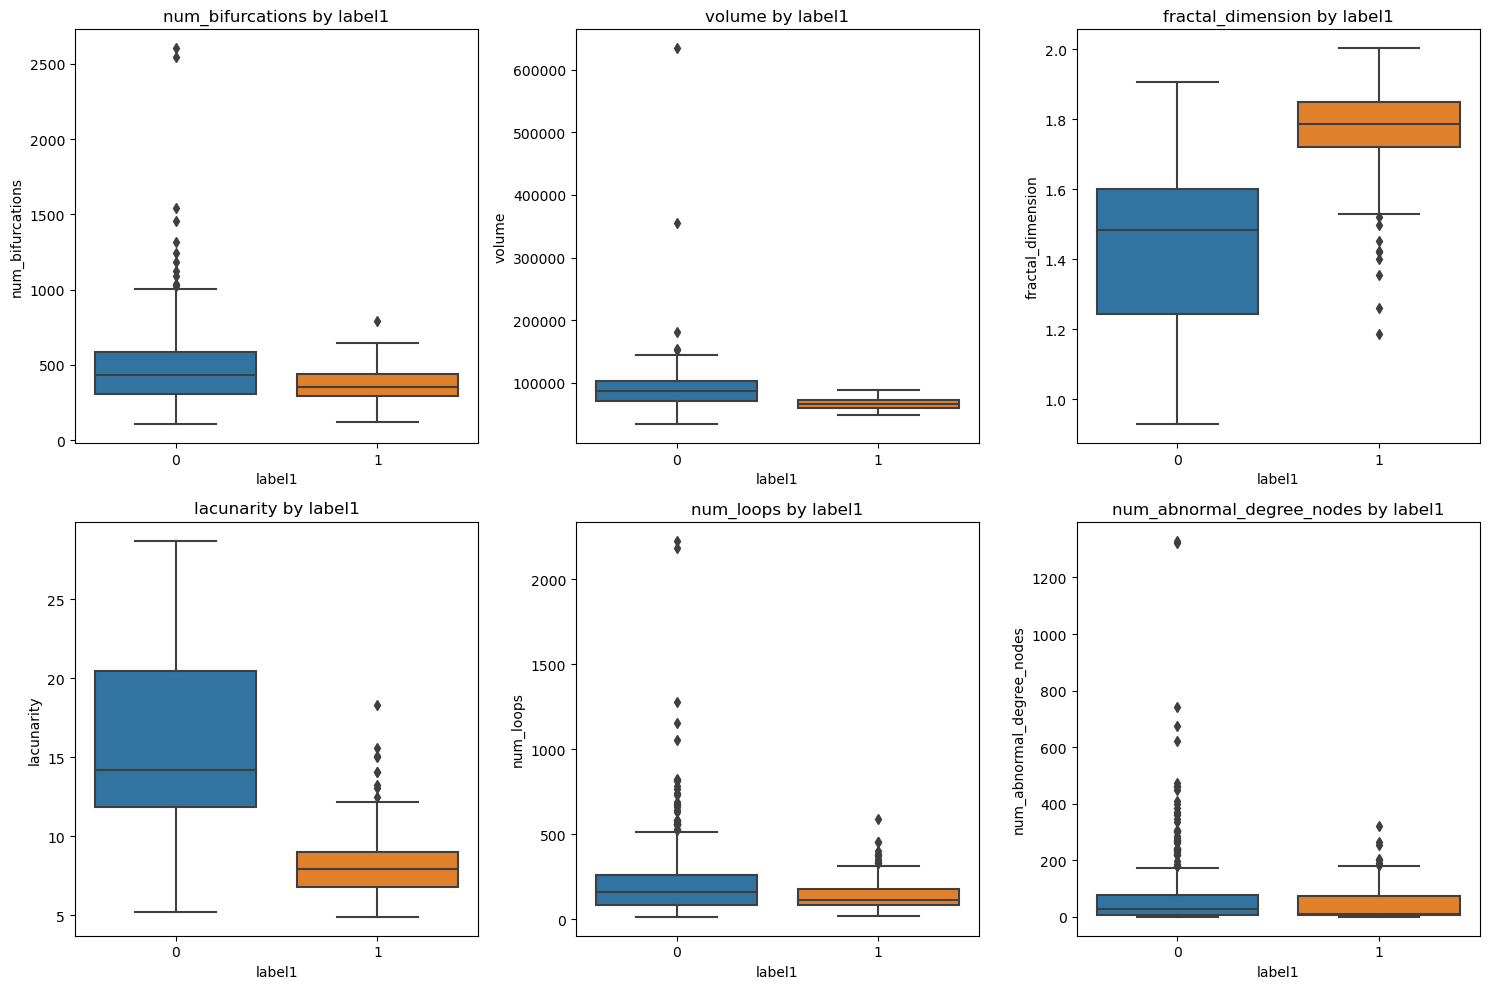

In [ ]:
features_to_plot = ['num_bifurcations', 'volume', 'fractal_dimension', 
                    'lacunarity', 'num_loops', 'num_abnormal_degree_nodes',
                    ]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='label1', y=feature, data=df_cleaned)
    plt.title(f'{feature} by label1')
plt.tight_layout()
plt.show()

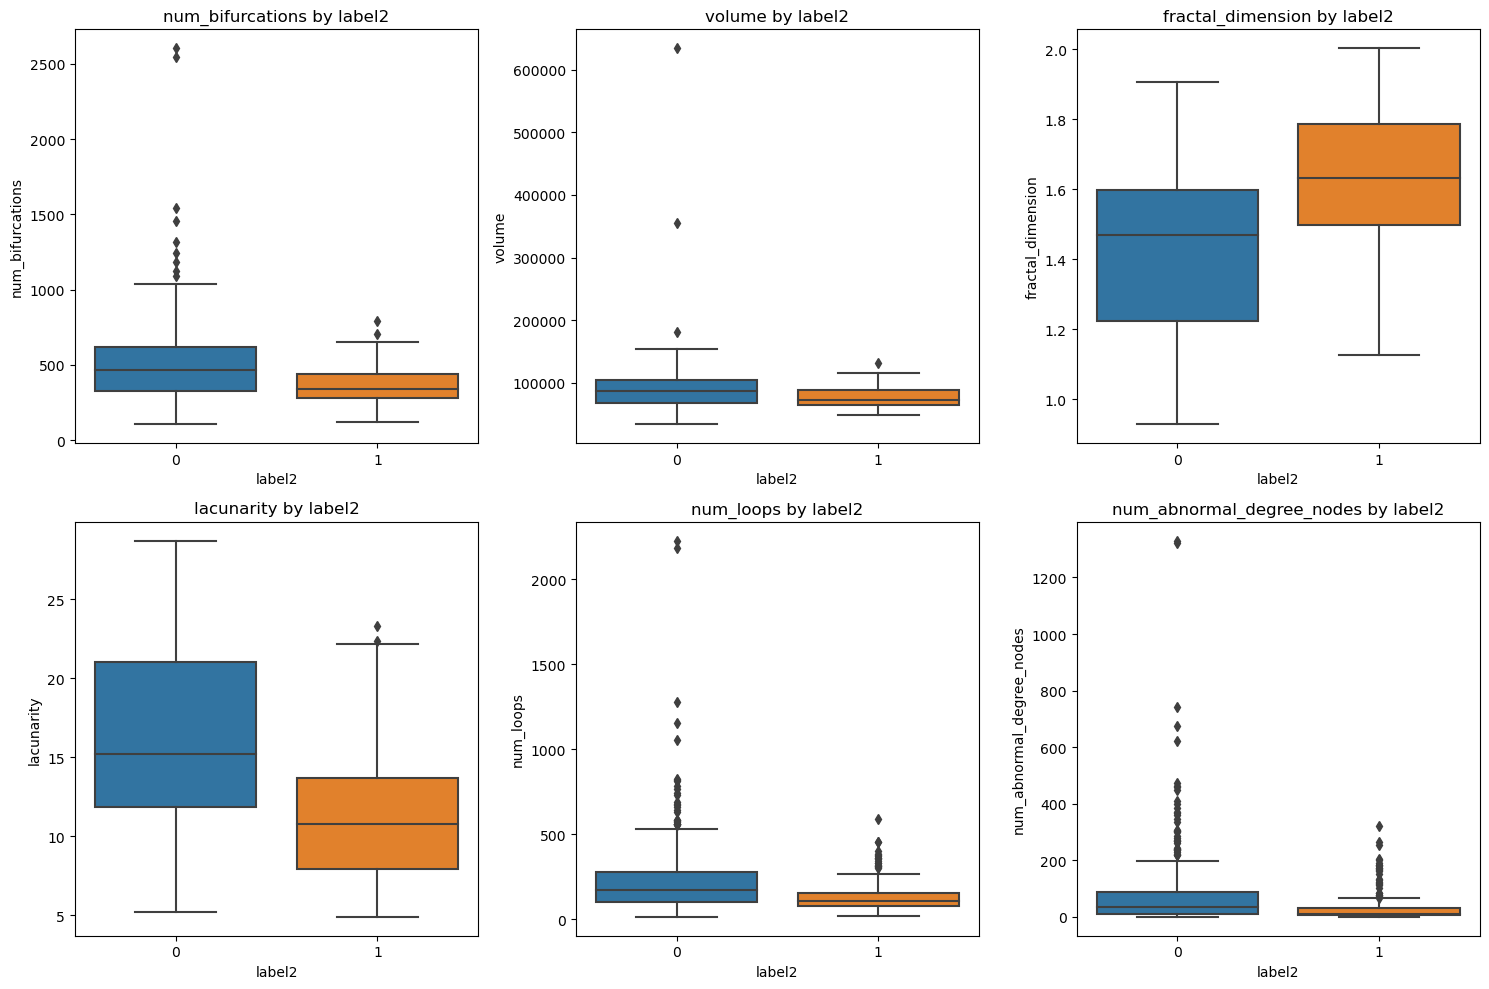

In [10]:
features_to_plot = ['num_bifurcations', 'volume', 'fractal_dimension', 
                    'lacunarity', 'num_loops', 'num_abnormal_degree_nodes']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='label2', y=feature, data=df_cleaned)
    plt.title(f'{feature} by label2')
plt.tight_layout()
plt.show()

## Feature Importance

Accuracy: 0.9542
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       109
           1       1.00      0.73      0.84        22

    accuracy                           0.95       131
   macro avg       0.97      0.86      0.91       131
weighted avg       0.96      0.95      0.95       131



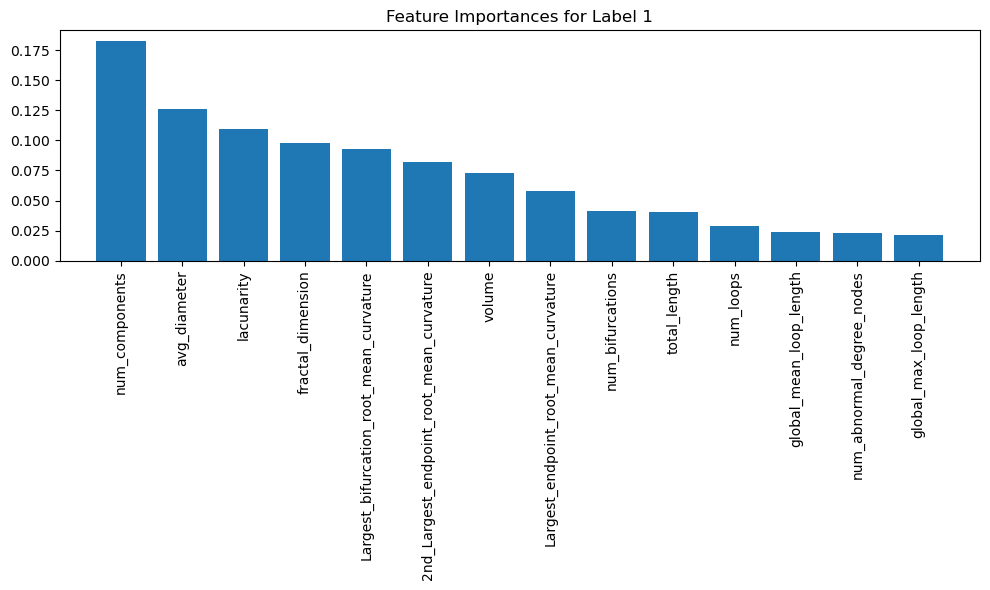

                                    Feature  Importance
13                           num_components    0.182357
10                             avg_diameter    0.126435
9                                lacunarity    0.109707
8                         fractal_dimension    0.098034
7   Largest_bifurcation_root_mean_curvature    0.093150


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare Features (X) and Target (y)
# We drop the ID column and the label columns from X
X = df_cleaned.drop(columns=['file_sorgente', 'label1', 'label2'])
y = df_cleaned['label1']

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Performance
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Visualize Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Label 1")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Print Top 5 Features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False).head(5))

Accuracy: 0.8397
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        89
           1       0.78      0.69      0.73        42

    accuracy                           0.84       131
   macro avg       0.82      0.80      0.81       131
weighted avg       0.84      0.84      0.84       131



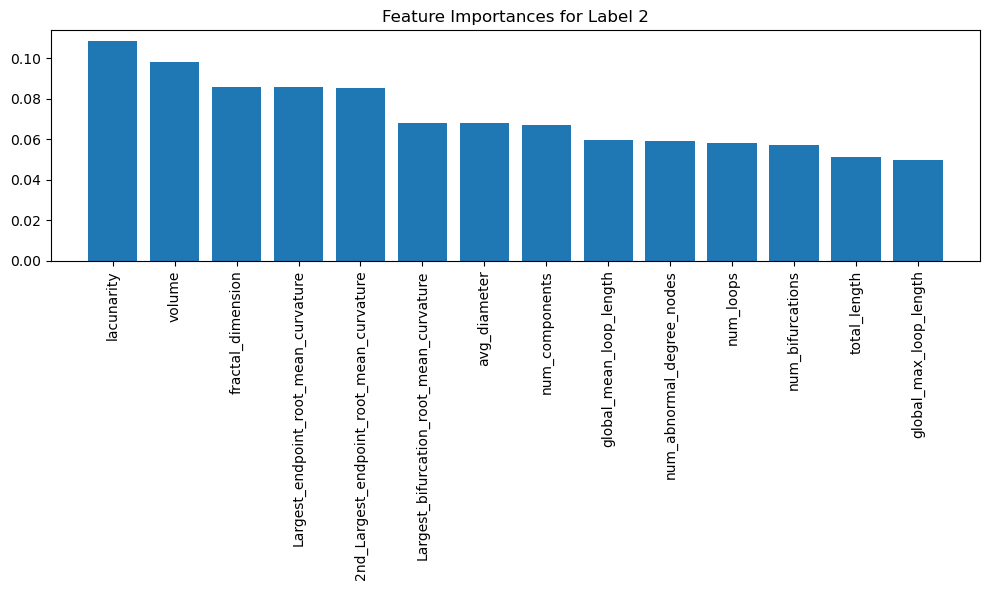

                                    Feature  Importance
9                                lacunarity    0.108298
2                                    volume    0.097953
8                         fractal_dimension    0.085913
5      Largest_endpoint_root_mean_curvature    0.085635
6  2nd_Largest_endpoint_root_mean_curvature    0.085045


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare Features (X) and Target (y)
# We drop the ID column and the label columns from X
X = df_cleaned.drop(columns=['file_sorgente', 'label1', 'label2'])
y = df_cleaned['label2']

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Performance
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Visualize Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Label 2")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Print Top 5 Features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False).head(5))